In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

(200, 2) (200, 1)


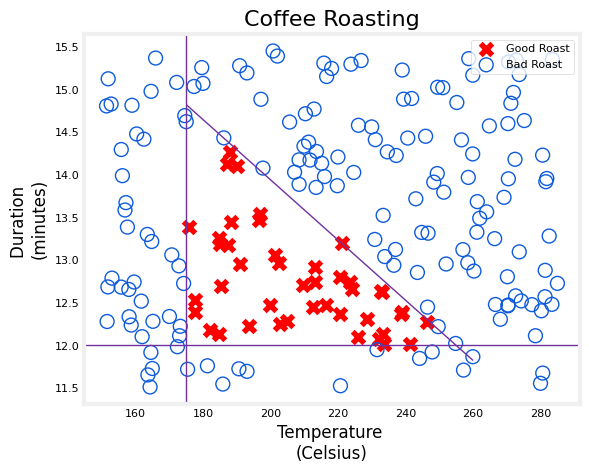

Temperature Max pre normalization: 284.99 | Min post normalization: 151.32
Duration Max pre normalization: 15.45 | Min post normalization: 11.51


In [3]:
X,Y = load_coffee_data()
print(X.shape, Y.shape)

plt_roast(X,Y)

print(f"Temperature Max pre normalization: {np.max(X[:,0]):0.2f} | Min post normalization: {np.min(X[:,0]):0.2f}")
print(f"Duration Max pre normalization: {np.max(X[:,1]):0.2f} | Min post normalization: {np.min(X[:,1]):0.2f}")


In [4]:

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")


Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


2025-11-05 14:15:01.003083: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)

tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name= 'layer1'),
        Dense(1, activation='sigmoid', name= 'layer2')
    ]
)
model.summary()


(200000, 2) (200000, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
L1_num_params = 2 * 3 + 3
L2_num_params = 3 * 1 + 1

W1, B1 = model.get_layer("layer1").get_weights()
W2, B2 = model.get_layer("layer2").get_weights()
print(f"W1: {W1.shape}:\n", W1, f"\nB1{B1.shape}:", B1)
print(f"W2: {W2.shape}:\n", W2, f"\nB2{B2.shape}:", B2)


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,
    epochs=10,
)



W1: (2, 3):
 [[  0.21 -11.22  14.34]
 [ 10.97  -0.28  11.95]] 
B1(3,): [ 13.17 -12.07   2.02]
W2: (3, 1):
 [[ 48.93]
 [-59.52]
 [-51.46]] 
B2(1,): [-14.8]
Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 366us/step - loss: 8.2499e-04
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 371us/step - loss: 6.2779e-04
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 367us/step - loss: 4.8744e-04
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step - loss: 3.8570e-04
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 369us/step - loss: 3.1109e-04
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 349us/step - loss: 2.5575e-04
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step - loss: 2.1414e-04
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 374us/step - loss: 1.8238e-04
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step - loss: 1.5774e-04
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 354us/step - loss: 1.3822e-04


In [8]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[  0.29 -11.9   16.74]
 [ 11.72  -0.3   13.88]] 
b1: [ 13.99 -12.6    2.46]
W2:
 [[ 75.22]
 [-85.17]
 [-75.54]] 
b2: [-21.59]
